In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from sklearn import tree, svm, datasets, metrics
from sklearn.model_selection import train_test_split,StratifiedKFold, ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from utilities import plot_2d_data, plot_2d_classifier, plot_confusionmatrix
from utilities import learning_curve_model, validation_curve_model, plot_learning_curve
from scipy import stats
import seaborn as sns
import os
import timeit

from utilities import get_colors
cm = get_colors(colormap='RdBu', n_colors=2)

In [2]:
data = pd.read_csv("./data/heart.csv")
data.shape

(303, 14)

In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data_X = data.drop(columns = ['target'], axis=1)/256
data_y = data['target']
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=100)

In [5]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [6]:
dtc = tree.DecisionTreeClassifier(random_state=100)
dtc.fit(train_X, train_y)

DecisionTreeClassifier(random_state=100)

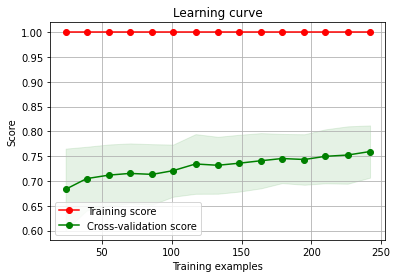

In [7]:
train_size=np.linspace(.1, 1.0, 15)
learning_curve_model(data_X, data_y, dtc, cv, train_size)
plt.show()

In [8]:
predict_y_train = dtc.predict(train_X)
predict_y = dtc.predict(test_X)
print(f"Training accuracy score: {100* accuracy_score(train_y, predict_y_train)}%")
print(f"Testing accuracy Score: {100* accuracy_score(test_y, predict_y)}%")

Training accuracy score: 100.0%
Testing accuracy Score: 73.77049180327869%


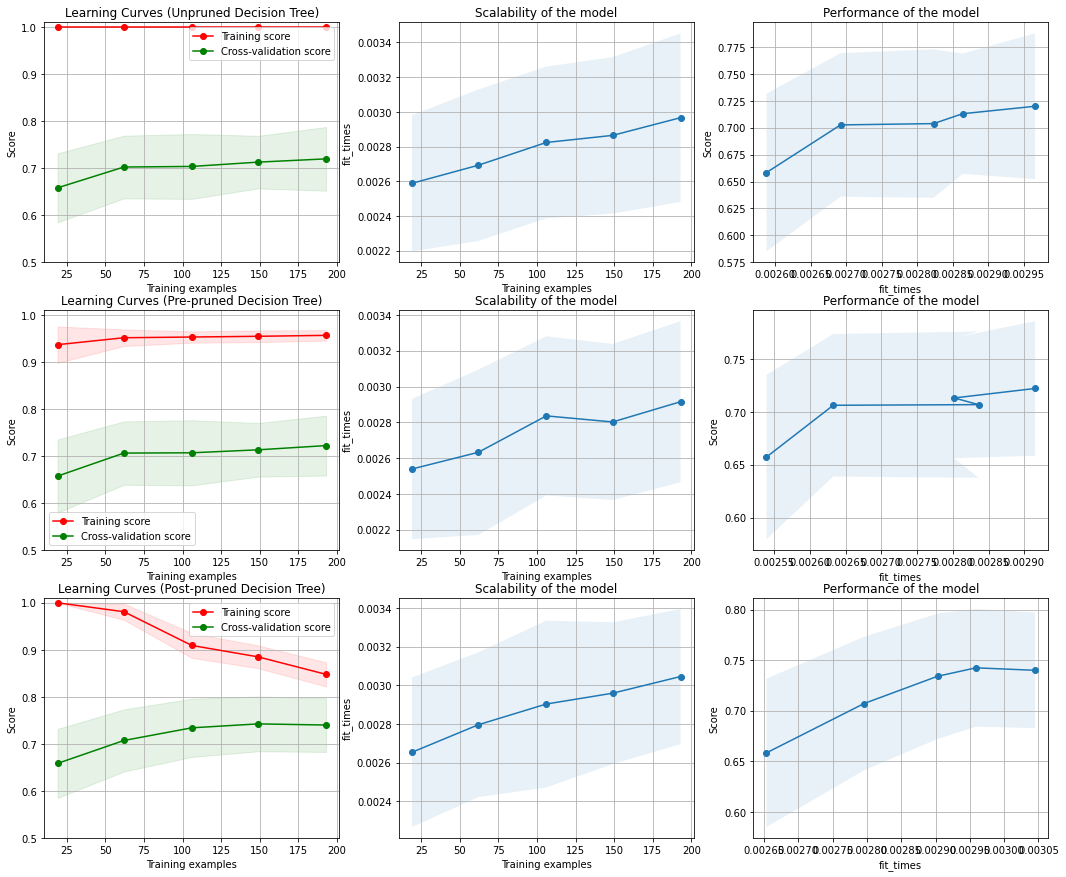

In [48]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

title = "Learning Curves (Unpruned Decision Tree)"
dtc = tree.DecisionTreeClassifier(random_state=100)
plot_learning_curve(dtc, title, train_X, train_y, axes=axes[0, :], ylim=(0.5, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Pre-pruned Decision Tree)"
dtc_pre = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3, random_state=100)
plot_learning_curve(dtc_pre, title, train_X, train_y, axes=axes[1,:], ylim=(0.5, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Post-pruned Decision Tree)"
dtc_post = tree.DecisionTreeClassifier(ccp_alpha=0.018, random_state=100)
plot_learning_curve(dtc_post, title, train_X, train_y, axes=axes[2,:], ylim=(0.5, 1.01), cv=cv, n_jobs=4)


plt.show()

### Neural Network

In [11]:
#fig, axes = plt.subplots(3, 1, figsize=(15, 15))

#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

#title = "Learning Curves (5 layer MLP)"
#clf1 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,), solver='sgd', max_iter=10000, random_state=18)
#clf1.fit(train_X, train_y)
#plt.subplot(clf1.loss_curve_)
#plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

#title = "Learning Curves (10 layer MLP)"
#clf2 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10,), solver='sgd', max_iter=10000, random_state=18)
#clf2.fit(train_X, train_y)
#plt.subplot(clf2.loss_curve_)
# plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.7, 1.01),cv=cv, n_jobs=4)

#title = "Learning Curves (15 layer MLP)"
#clf3 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(15,), solver='sgd', max_iter=10000, random_state=18)
#clf3.fit(train_X, train_y)
#plt.subplot(clf3.loss_curve_)
# plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.7, 1.01), cv=cv, n_jobs=4)


#plt.show()

In [37]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(13,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [38]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
train2_X, val_X, train2_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=100)

hist = model.fit(train2_X, train2_y,
          batch_size=32, epochs=150,
          validation_data=(val_X, val_y))


Epoch 1/150
7/7 [==============================] - 0s 17ms/step - loss: 0.7330 - accuracy: 0.4560 - val_loss: 0.7496 - val_accuracy: 0.3469
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.4560 - val_loss: 0.7445 - val_accuracy: 0.3469
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 0.7181 - accuracy: 0.4560 - val_loss: 0.7287 - val_accuracy: 0.3469
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.4560 - val_loss: 0.7265 - val_accuracy: 0.3469
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 0.7091 - accuracy: 0.4560 - val_loss: 0.7137 - val_accuracy: 0.3469
Epoch 6/150
7/7 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.4560 - val_loss: 0.7044 - val_accuracy: 0.3469
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.4560 - val_loss: 0.7046 - val_accuracy: 0.3469
Epoch 8/150
7/7 [=========

7/7 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5440 - val_loss: 0.6649 - val_accuracy: 0.6531
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5440 - val_loss: 0.6669 - val_accuracy: 0.6531
Epoch 61/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5440 - val_loss: 0.6637 - val_accuracy: 0.6531
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5440 - val_loss: 0.6662 - val_accuracy: 0.6531
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5440 - val_loss: 0.6630 - val_accuracy: 0.6531
Epoch 64/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5440 - val_loss: 0.6656 - val_accuracy: 0.6531
Epoch 65/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5440 - val_loss: 0.6625 - val_accuracy: 0.6531
Epoch 66/150
7/7 [===============

7/7 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5440 - val_loss: 0.6533 - val_accuracy: 0.6531
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5440 - val_loss: 0.6516 - val_accuracy: 0.6531
Epoch 119/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5440 - val_loss: 0.6500 - val_accuracy: 0.6531
Epoch 120/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5440 - val_loss: 0.6487 - val_accuracy: 0.6531
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5440 - val_loss: 0.6476 - val_accuracy: 0.6531
Epoch 122/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5440 - val_loss: 0.6466 - val_accuracy: 0.6531
Epoch 123/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5440 - val_loss: 0.6459 - val_accuracy: 0.6531
Epoch 124/150
7/7 [========

In [40]:
model.evaluate(test_X, test_y)[1]

2/2 [==============================] - 0s 758us/step - loss: 0.6823 - accuracy: 0.4918


0.49180328845977783

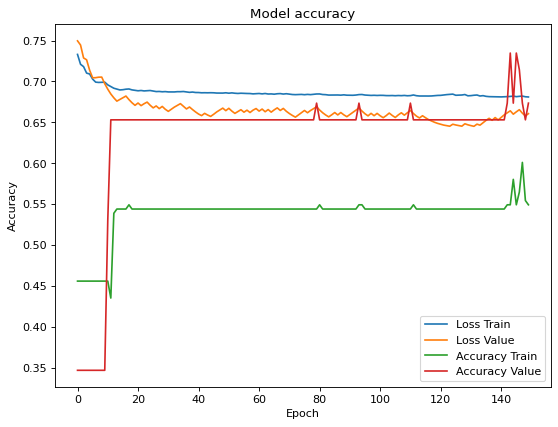

In [41]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss Train', 'Loss Value', 'Accuracy Train', 'Accuracy Value'], loc='best')
plt.show()

### Boosting

In [20]:
n_learning_rate_steps, n_folds = 10, 10
learninn_learning_rate_steps, n_folds = 10, 10
learning_rates = np.linspace(0.1, 1.0, num=n_learning_rate_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)
trn_err = np.zeros((n_learning_rate_steps, n_folds))
val_err = np.zeros((n_learning_rate_steps, n_folds))
stump = DecisionTreeClassifier(max_depth=1, random_state = 100)
 
for i, rate in enumerate(learning_rates):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump, 
                                   n_estimators=10, learning_rate=rate)
        model.fit(train_X.values[trn, :], train_y.values[trn])
        trn_err[i, j] = 1 - accuracy_score(train_y.values[trn], model.predict(train_X.values[trn, :]))
        val_err[i, j] = 1 - accuracy_score(train_y.values[val], model.predict(train_X.values[val, :]))
trn_err = np.mean(trn_err, axis=1)
val_err = np.mean(val_err, axis=1)
print(f'Training Error {trn_err}, Value Error {val_err}')


Training Error [0.17262715 0.16620936 0.14739357 0.13590876 0.1207479  0.12809792
 0.13039361 0.12488268 0.12948252 0.13774363], Value Error [0.198      0.1735     0.19066667 0.20616667 0.14883333 0.1485
 0.19066667 0.1655     0.166      0.16933333]


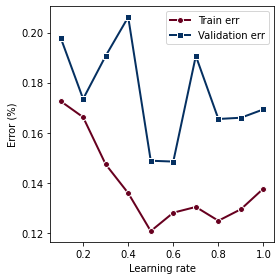

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(learning_rates, trn_err, marker='o', c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(learning_rates, val_err, marker='s', c=cm[1], markeredgecolor='w', linewidth=2)
ax.legend(['Train err', 'Validation err'])
ax.set_xlabel('Learning rate')
ax.set_ylabel('Error (%)')

fig.tight_layout()

In [22]:
n_learning_rate_steps, n_folds = 10, 10
learning_rates = np.linspace(0.1, 1.0, num=n_learning_rate_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)
trn_err = np.zeros((n_learning_rate_steps, n_folds))
val_err = np.zeros((n_learning_rate_steps, n_folds))
stump = DecisionTreeClassifier(max_depth=1, random_state = 100)

In [24]:
n_estimator_steps, n_folds = 2, 10
number_of_stumps = np.arange(2, 40, n_estimator_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)

trn_err = np.zeros((len(number_of_stumps), n_folds))
val_err = np.zeros((len(number_of_stumps), n_folds))

stump = DecisionTreeClassifier(max_depth=1)
for i, n_stumps in enumerate(number_of_stumps):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump,
                                   n_estimators=n_stumps, learning_rate=0.9)
        model.fit(train_X.values[trn, :], train_y.values[trn])

        trn_err[i, j] = 1 - accuracy_score(train_y.values[trn], 
                                           model.predict(train_X.values[trn, :]))
        val_err[i, j] = 1 - accuracy_score(train_y.values[val], 
                                           model.predict(train_X.values[val, :]))

trn_err = np.mean(trn_err, axis=1)
val_err = np.mean(val_err, axis=1)

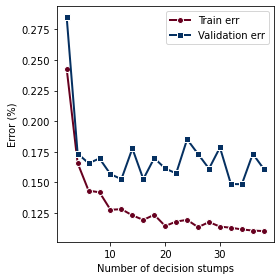

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(number_of_stumps, trn_err, marker='o', c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(number_of_stumps, val_err, marker='s', c=cm[1], markeredgecolor='w', linewidth=2)
ax.legend(['Train err', 'Validation err'])
ax.set_xlabel('Number of decision stumps')
ax.set_ylabel('Error (%)')

fig.tight_layout()

In [26]:
shallow_tree = DecisionTreeClassifier(max_depth=1)
ensemble = AdaBoostClassifier(base_estimator=shallow_tree, 
                                  n_estimators=32, learning_rate=0.6)
ensemble.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.6, n_estimators=32)

In [27]:
ypred = ensemble.predict(test_X)
acc = accuracy_score(test_y, ypred)
acc

0.8688524590163934

### SVM

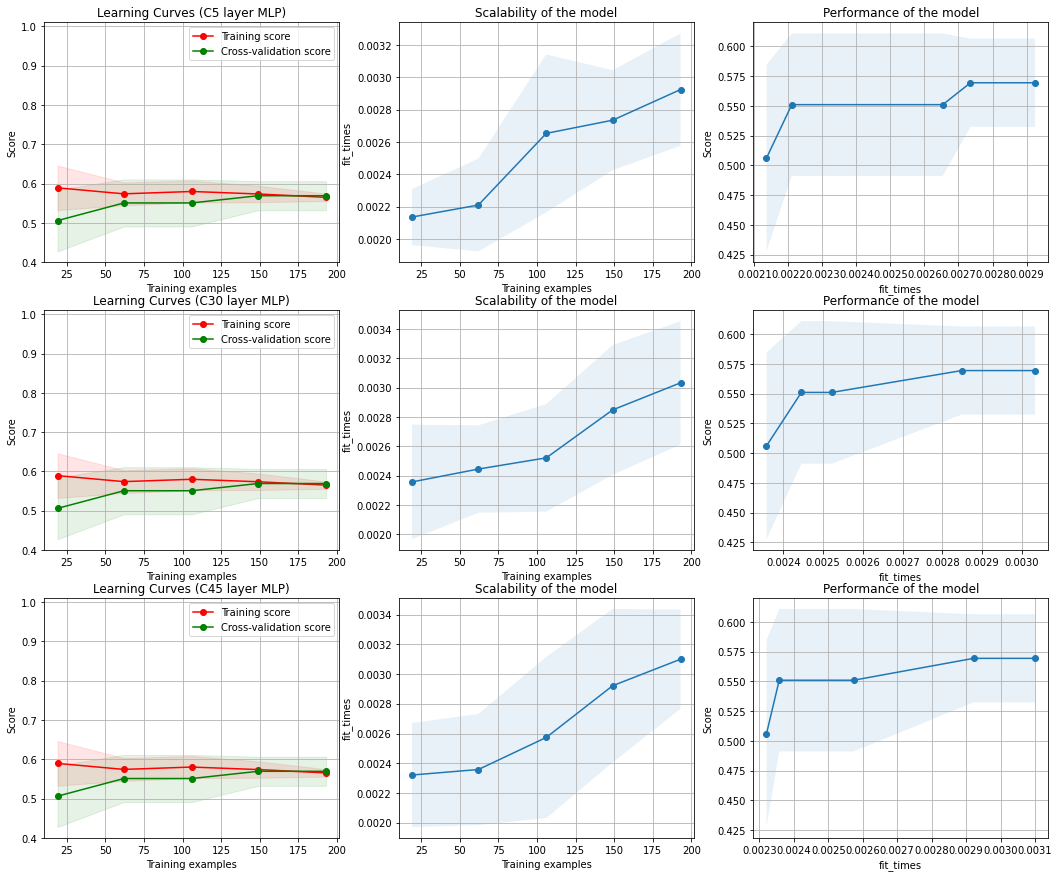

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

title = "Learning Curves (C5 layer MLP)"
clf1 = model = svm.SVC(kernel='poly', C=15, gamma='auto')
clf1.fit(train_X, train_y)
plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C30 layer MLP)"
clf2 = model = svm.SVC(kernel='poly', C=30, gamma='auto')
clf2.fit(train_X, train_y)
plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C45 layer MLP)"
clf3 = model = svm.SVC(kernel='poly', C=45, gamma='auto')
clf3.fit(train_X, train_y)
plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)


plt.show()

In [32]:
print(f'Best Score - C5: {clf1.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C30: {clf2.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C45: {clf3.score(test_X, test_y)*100:.2f}%')

Best Score - C5: 65.57%
Best Score - C30: 78.69%
Best Score - C45: 75.41%


### KNN

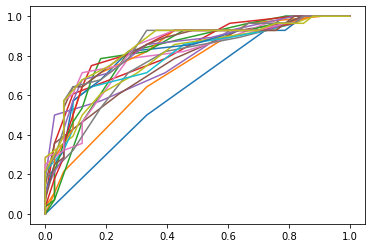

In [33]:
# try to find best k value
scoreList = []
for i in range(2,40,2):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(train_X, train_y)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, knn2.predict_proba(test_X)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(test_y,knn2.predict(test_X))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (f'# Nodes: {i}', auc))
    scoreList.append(knn2.score(test_X, test_y))
    # Custom settings for the plot 

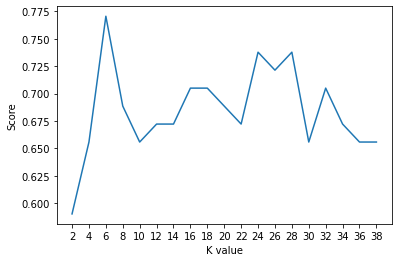

In [34]:
plt.plot(range(2,40,2), scoreList)
plt.xticks(np.arange(2,40,2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


In [35]:
acc = max(scoreList)*100
print(f'Maximum KNN Accuracy is {acc:.2f}%')

Maximum KNN Accuracy is 77.05%
